<a href="https://colab.research.google.com/github/RaianaSeixas/NLT/blob/main/Relevant_Job__Title_Pictures_v10_KMeans_JOIN_DATASET_cluster21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Describe...

----------
Author: Raiana Roland Seixas
09/07/2022

# Data load & Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.cluster import KMeans
from sklearn.neural_network import BernoulliRBM

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import adjusted_rand_score

In [ ]:
!git clone https://github.com/RaianaSeixas/NLT
%cd NLT

Cloning into 'NLT'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 28 (delta 13), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.
/content/NLT/NLT/NLT/NLT/NLT/NLT/NLT/NLT/NLT/NLT/NLT/NLT/NLT/NLT/NLT/NLT/NLT/NLT/NLT


In [ ]:
df=pd.read_csv('occupation_pictures.csv')
df

,Job Title,Pic Title,Num Resumes,Google Position,Strict Face Count,Relaxed Face Count,KB size,Height,Width,Resolution,Text Regions,Picture URL,Manual Label
0,3D Modeler,Our Top 19 3D Modeling Software Picks ...,1261,0,0,7,276.763672,1917,2301,4411017,2,https://format-magazine-production-res.cloudin...,NaN
1,3D Modeler,7 Tips for Beginner 3D Modelers ...,1261,1,0,3,44.343750,340,747,253980,5,http://static1.squarespace.com/static/5320f582...,NaN
2,3D Modeler,How to Become an Expert 3D Modeler ...,1261,2,0,2,43.088867,380,660,250800,8,https://www.gamedesigning.org/wp-content/uploa...,NaN
3,3D Modeler,What is 3D Modeling & What's It Used For?,1261,3,0,2,78.623047,330,750,247500,1,https://cdn.conceptartempire.com/images/04/522...,NaN
4,3D Modeler,Shoofping 3D Modeler ...,1261,4,0,1,97.517578,1075,1909,2052175,3,http://shoofping.com/wp-content/uploads/2017/1...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,Wind Turbine Engineer,Wind turbine technician fastest-growing ...,61,4,0,0,89.249023,720,1280,921600,0,https://i.ytimg.com/vi/lUf2mOYp1d4/maxresdefau...,good
654,Wind Turbine Engineer,How to Become a Wind Energy Engineer ...,61,5,0,0,37.949219,200,300,60000,0,https://www.environmentalscience.org/wp-conten...,NaN
655,Wind Turbine Engineer,Wind - Get Into Energy,61,6,0,1,324.730469,500,750,375000,1,http://getintoenergy.com/wp-content/uploads/20...,good
656,Wind Turbine Engineer,Wind-energy programs yield engineering ...,61,7,0,1,36.197266,920,613,563960,0,https://s.hdnux.com/photos/20/15/22/4248747/3/...,good


In [ ]:
documents = list(df['Pic Title'].values)
job = list(df['Job Title'].values)

In [ ]:
corpus = documents + job

In [ ]:
def text_variable(corpus,documents,cluster_k):
  vectorizer = TfidfVectorizer(stop_words='english')
  XW = vectorizer.fit_transform(corpus)
  model = KMeans(n_clusters=cluster_k, init='k-means++', max_iter=100, n_init=1)
  model.fit(XW)
  resp = []
  for x in documents:
    doc=[]
    doc.append(x)
    Y = vectorizer.transform(doc)
    prediction = model.predict(Y)
    resp.append(prediction[0])
  return resp

In [ ]:
def text_variable_Birch(corpus,documents,cluster_k):
  vectorizer = TfidfVectorizer(stop_words='english')
  XW = vectorizer.fit_transform(corpus)

  model = Birch(threshold=0.01, n_clusters = cluster_k)
  model.fit(XW)
  resp = []
  for x in documents:
    doc=[]
    doc.append(x)
    Y = vectorizer.transform(doc)
    prediction = model.predict(Y)
    resp.append(prediction[0])
  return resp

In [ ]:
#resp

In [ ]:
data=df.drop(columns=['Picture URL'])

In [ ]:
data['Manual Label'].describe()

count      133
unique       2
top       good
freq        91
Name: Manual Label, dtype: object

In [ ]:
data['Pic Title'].describe()

count                            658
unique                           593
top       Bureau of Labor Statistics
freq                              17
Name: Pic Title, dtype: object

# Exploratory Analysis

# Data Preprocessing

In [ ]:
import nltk
ps = nltk.PorterStemmer()
wn=nltk.WordNetLemmatizer()
nltk.download("popular")
stopwords = nltk.corpus.stopwords.words('english')
import re
import string

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

### Clean up text

In [ ]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

data['Job Title'] = data['Job Title'].apply(lambda x: clean_text(x.lower()))
data['Pic Title'] = data['Pic Title'].apply(lambda x: clean_text(x.lower()))
data.head()

,Job Title,Pic Title,Num Resumes,Google Position,Strict Face Count,Relaxed Face Count,KB size,Height,Width,Resolution,Text Regions,Manual Label
0,"[3d, modeler]","[top, 19, 3d, modeling, software, picks, ]",1261,0,0,7,276.763672,1917,2301,4411017,2,NaN
1,"[3d, modeler]","[7, tips, beginner, 3d, modelers, ]",1261,1,0,3,44.343750,340,747,253980,5,NaN
2,"[3d, modeler]","[become, expert, 3d, modeler, ]",1261,2,0,2,43.088867,380,660,250800,8,NaN
3,"[3d, modeler]","[3d, modeling, whats, used]",1261,3,0,2,78.623047,330,750,247500,1,NaN
4,"[3d, modeler]","[shoofping, 3d, modeler, ]",1261,4,0,1,97.517578,1075,1909,2052175,3,NaN


In [ ]:
data.columns

Index(['Job Title', 'Pic Title', 'Num Resumes', 'Google Position',
       'Strict Face Count', 'Relaxed Face Count', 'KB size', 'Height', 'Width',
       'Resolution', 'Text Regions', 'Manual Label'],
      dtype='object')

### Stem / Lemmatize text

In [ ]:
def stemming(text):
  stemmed=[ps.stem(word) for word in text]
  return stemmed

data['Stem Job Title'] = data['Job Title'].apply(lambda x: stemming(x))
data['Stem Pic Title'] = data['Pic Title'].apply(lambda x: stemming(x))
data

,Job Title,Pic Title,Num Resumes,Google Position,Strict Face Count,Relaxed Face Count,KB size,Height,Width,Resolution,Text Regions,Manual Label,Stem Job Title,Stem Pic Title
0,"[3d, modeler]","[top, 19, 3d, modeling, software, picks, ]",1261,0,0,7,276.763672,1917,2301,4411017,2,NaN,"[3d, model]","[top, 19, 3d, model, softwar, pick, ]"
1,"[3d, modeler]","[7, tips, beginner, 3d, modelers, ]",1261,1,0,3,44.343750,340,747,253980,5,NaN,"[3d, model]","[7, tip, beginn, 3d, model, ]"
2,"[3d, modeler]","[become, expert, 3d, modeler, ]",1261,2,0,2,43.088867,380,660,250800,8,NaN,"[3d, model]","[becom, expert, 3d, model, ]"
3,"[3d, modeler]","[3d, modeling, whats, used]",1261,3,0,2,78.623047,330,750,247500,1,NaN,"[3d, model]","[3d, model, what, use]"
4,"[3d, modeler]","[shoofping, 3d, modeler, ]",1261,4,0,1,97.517578,1075,1909,2052175,3,NaN,"[3d, model]","[shoofp, 3d, model, ]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,"[wind, turbine, engineer]","[wind, turbine, technician, fastestgrowing, ]",61,4,0,0,89.249023,720,1280,921600,0,good,"[wind, turbin, engin]","[wind, turbin, technician, fastestgrow, ]"
654,"[wind, turbine, engineer]","[become, wind, energy, engineer, ]",61,5,0,0,37.949219,200,300,60000,0,NaN,"[wind, turbin, engin]","[becom, wind, energi, engin, ]"
655,"[wind, turbine, engineer]","[wind, get, energy]",61,6,0,1,324.730469,500,750,375000,1,good,"[wind, turbin, engin]","[wind, get, energi]"
656,"[wind, turbine, engineer]","[windenergy, programs, yield, engineering, ]",61,7,0,1,36.197266,920,613,563960,0,good,"[wind, turbin, engin]","[windenergi, program, yield, engin, ]"


In [ ]:
data[data['Manual Label']=='bad']

,Job Title,Pic Title,Num Resumes,Google Position,Strict Face Count,Relaxed Face Count,KB size,Height,Width,Resolution,Text Regions,Manual Label,Stem Job Title,Stem Pic Title
29,[assistant],"[google, assistant, 20, change, ]",347272,2,0,0,56.383789,640,1280,819200,1,bad,[assist],"[googl, assist, 20, chang, ]"
40,"[assistant, curator]","[yale, university, art, gallery, appoints, ]",868,1,1,1,57.474609,576,864,497664,0,bad,"[assist, curat]","[yale, univers, art, galleri, appoint, ]"
48,"[assistant, designer]","[assistant, costume, designer, get, media]",5358,1,1,1,19.559570,210,280,58800,0,bad,"[assist, design]","[assist, costum, design, get, media]"
50,"[assistant, designer]","[assistant, designer]",5358,3,0,3,104.434570,479,638,305602,4,bad,"[assist, design]","[assist, design]"
56,"[benefits, consultant]","[benefits, consultant, ]",3890,0,0,1,52.086914,480,720,345600,0,bad,"[benefit, consult]","[benefit, consult, ]"
57,"[benefits, consultant]","[benefits, consultant, ]",3890,1,0,1,20.233398,200,300,60000,0,bad,"[benefit, consult]","[benefit, consult, ]"
58,"[benefits, consultant]","[surprising, ways, benefits, consultant, ]",3890,3,0,1,18.697266,200,300,60000,0,bad,"[benefit, consult]","[surpris, way, benefit, consult, ]"
59,"[benefits, consultant]","[benefits, consultant, ]",3890,4,0,0,28.780273,720,1280,921600,0,bad,"[benefit, consult]","[benefit, consult, ]"
60,"[benefits, consultant]","[benefits, consultant, ]",3890,5,0,1,14.895508,273,375,102375,0,bad,"[benefit, consult]","[benefit, consult, ]"
62,"[benefits, consultant]","[ask, employee, benefits, consultant, ]",3890,7,0,0,61.863281,398,602,239596,0,bad,"[benefit, consult]","[ask, employe, benefit, consult, ]"


In [ ]:
data[data['Manual Label']=='good']

,Job Title,Pic Title,Num Resumes,Google Position,Strict Face Count,Relaxed Face Count,KB size,Height,Width,Resolution,Text Regions,Manual Label,Stem Job Title,Stem Pic Title
21,"[architectural, drafter]","[9, firms, offering, architecture, ]",1824,1,0,2,529.085938,1382,2200,3040400,2,good,"[architectur, drafter]","[9, firm, offer, architectur, ]"
24,"[architectural, drafter]","[2017, architectural, drafter, careercastcom]",1824,4,0,1,28.923828,446,600,267600,0,good,"[architectur, drafter]","[2017, architectur, drafter, careercastcom]"
32,[assistant],"[personal, assistant, apps, ]",347272,7,1,2,390.638672,844,1243,1049092,0,good,[assist],"[person, assist, app, ]"
39,"[assistant, curator]","[assistant, curator, ancient, ]",868,0,1,10,640.045898,1500,2000,3000000,0,good,"[assist, curat]","[assist, curat, ancient, ]"
41,"[assistant, curator]","[assistant, curator, nicole, smythejohnson, ]",868,2,0,2,77.317383,720,1280,921600,0,good,"[assist, curat]","[assist, curat, nicol, smythejohnson, ]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,"[wind, turbine, engineer]","[wind, turbine, technician, ]",61,3,0,2,142.578125,1200,1200,1440000,0,good,"[wind, turbin, engin]","[wind, turbin, technician, ]"
653,"[wind, turbine, engineer]","[wind, turbine, technician, fastestgrowing, ]",61,4,0,0,89.249023,720,1280,921600,0,good,"[wind, turbin, engin]","[wind, turbin, technician, fastestgrow, ]"
655,"[wind, turbine, engineer]","[wind, get, energy]",61,6,0,1,324.730469,500,750,375000,1,good,"[wind, turbin, engin]","[wind, get, energi]"
656,"[wind, turbine, engineer]","[windenergy, programs, yield, engineering, ]",61,7,0,1,36.197266,920,613,563960,0,good,"[wind, turbin, engin]","[windenergi, program, yield, engin, ]"


In [ ]:
arr1 = data['Stem Job Title'].values # first information (common small)
arr2 = data['Stem Pic Title'].values # second information
n = arr1.shape[0] # n = 658
lista = []
divide = []
for i in range(n):
  aux =0
  c1 = list(arr1[i])
  for x in arr1[i]:
    c2 = list(arr2[i])
    if(c2.count(x) != 0):
      aux = aux + 1
  lista.append(aux)
  try:
   divide.append(len(c1)/aux)
  except:
   divide.append(0)
print(lista)
print(divide)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0, 0, 0, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1, 1, 1, 3, 3, 2, 3, 3, 3, 2, 0, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 2, 1, 2, 2, 2, 2, 4, 4, 2, 2, 4, 1, 2, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 3, 3, 3, 3, 3, 2, 3, 3, 1, 1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 1, 0, 2, 2, 1, 0, 3, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 2, 0, 1, 2, 0, 2, 2, 2, 2, 0, 0, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 0, 3, 3, 0, 2, 4, 0, 1, 0, 2, 0, 0, 3, 3, 3, 3, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 3, 0, 2, 0, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 1, 1, 0, 0, 1, 1, 1, 2, 3, 1, 3, 3, 3, 2, 3, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 

In [ ]:
arr1 = 'career'
arr2 = data['Stem Pic Title'].values # second information
n = arr2.shape[0] # n = 658
career = []
for i in range(n):
  aux =0
  c1 = arr1
  c2 = list(arr2[i])
  if(c2.count(c1) != 0):
    career.append(1)
  else:
    career.append(0)
print(career)


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 

In [ ]:
'''
arr1 = data['Stem Job Title'].values # first information (common small)
arr2 = data['Stem Pic Title'].values # second information
n = arr1.shape[0] # n = 658
lista = []
divide = []
verifica = []
for i in range(n):
  aux =0
  c1 = list(arr1[i])
  for x in arr1[i]:
    c2 = list(arr2[i])
    t1 = x[:4]
    for t2 in c2:
      if(t2[:4].count(t1) != 0):
        aux = aux + 1
  lista.append(aux)
  try:
   divide.append(len(c1)/aux)
  except:
   divide.append(0)
  verifica.append([t2[:4],t1])
print(lista)
print(divide)
'''

"\narr1 = data['Stem Job Title'].values # first information (common small)\narr2 = data['Stem Pic Title'].values # second information\nn = arr1.shape[0] # n = 658\nlista = []\ndivide = []\nverifica = []\nfor i in range(n):\n  aux =0\n  c1 = list(arr1[i])\n  for x in arr1[i]:\n    c2 = list(arr2[i])\n    t1 = x[:4]\n    for t2 in c2:\n      if(t2[:4].count(t1) != 0):\n        aux = aux + 1\n  lista.append(aux)\n  try:\n   divide.append(len(c1)/aux)\n  except:\n   divide.append(0)\n  verifica.append([t2[:4],t1])\nprint(lista)\nprint(divide)\n"

In [ ]:
# print(verifica)

In [ ]:
for x in c2:
  print(x[:4])

care
map
wind
tech



In [ ]:
data.head()

,Job Title,Pic Title,Num Resumes,Google Position,Strict Face Count,Relaxed Face Count,KB size,Height,Width,Resolution,Text Regions,Manual Label,Stem Job Title,Stem Pic Title
0,"[3d, modeler]","[top, 19, 3d, modeling, software, picks, ]",1261,0,0,7,276.763672,1917,2301,4411017,2,NaN,"[3d, model]","[top, 19, 3d, model, softwar, pick, ]"
1,"[3d, modeler]","[7, tips, beginner, 3d, modelers, ]",1261,1,0,3,44.343750,340,747,253980,5,NaN,"[3d, model]","[7, tip, beginn, 3d, model, ]"
2,"[3d, modeler]","[become, expert, 3d, modeler, ]",1261,2,0,2,43.088867,380,660,250800,8,NaN,"[3d, model]","[becom, expert, 3d, model, ]"
3,"[3d, modeler]","[3d, modeling, whats, used]",1261,3,0,2,78.623047,330,750,247500,1,NaN,"[3d, model]","[3d, model, what, use]"
4,"[3d, modeler]","[shoofping, 3d, modeler, ]",1261,4,0,1,97.517578,1075,1909,2052175,3,NaN,"[3d, model]","[shoofp, 3d, model, ]"


career, senior

In [ ]:
'''def lemmatized(text):
  lemmatized= [wn.lemmatize(word) for word in text]
  return lemmatized

data['Lemma Job Title'] = data['Job Title'].apply(lambda x: lemmatized(x))
data['Lemma Pic Title'] = data['Pic Title'].apply(lambda x: lemmatized(x))
data'''

"def lemmatized(text):\n  lemmatized= [wn.lemmatize(word) for word in text]\n  return lemmatized\n\ndata['Lemma Job Title'] = data['Job Title'].apply(lambda x: lemmatized(x))\ndata['Lemma Pic Title'] = data['Pic Title'].apply(lambda x: lemmatized(x))\ndata"

###Data split

In [ ]:
data=data.drop(columns=['Job Title','Pic Title'])

In [ ]:
''' Data (with labels) to test the model '''

labaled= data[data['Manual Label'].notna()]
labaled.head()

,Num Resumes,Google Position,Strict Face Count,Relaxed Face Count,KB size,Height,Width,Resolution,Text Regions,Manual Label,Stem Job Title,Stem Pic Title
21,1824,1,0,2,529.085938,1382,2200,3040400,2,good,"[architectur, drafter]","[9, firm, offer, architectur, ]"
24,1824,4,0,1,28.923828,446,600,267600,0,good,"[architectur, drafter]","[2017, architectur, drafter, careercastcom]"
29,347272,2,0,0,56.383789,640,1280,819200,1,bad,[assist],"[googl, assist, 20, chang, ]"
32,347272,7,1,2,390.638672,844,1243,1049092,0,good,[assist],"[person, assist, app, ]"
39,868,0,1,10,640.045898,1500,2000,3000000,0,good,"[assist, curat]","[assist, curat, ancient, ]"


In [ ]:
#Drop target feature
#X = data.drop(columns=['Manual Label','Stem Job Title','Stem Pic Title','KB size','Num Resumes','Google Position','Width','Text Regions']) 
X = data.drop(columns=['Height','Manual Label','Stem Job Title','Stem Pic Title','KB size','Resolution','Width']) 
#'Num Resumes','Google Position','Text Regions'
#X = data.drop(columns=['Manual Label','Stem Job Title','Stem Pic Title']) 
#X['Common']=lista
#X['Division']=divide
#X['Career'] = career
ncluster = 10
resp = text_variable(corpus,documents,ncluster)
X['Doc_title'] = resp
ncluster = 10
resp = text_variable(corpus,job,ncluster)
X['Doc_job'] = resp
W = X
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

# Predictive Model

In [ ]:
#y_pred = KMeans(n_clusters=2).fit_predict(X)
y_pred = KMeans(n_clusters=2, init='k-means++', max_iter=200, n_init=1).fit_predict(X)

In [ ]:
len(y_pred)

658

In [ ]:
# get the elements containing label (we will use it to evaluate the method)
y = data['Manual Label'].replace({'good':0, 'bad':1})
index_no = data['Manual Label'].notna()
y_real = y[index_no].astype(int)
X_eval= X[index_no,:]
y_mod = y_pred[index_no]

In [ ]:
y_real.shape, y_mod.shape

((133,), (133,))



               precision    recall  f1-score   support

      0-Good       0.69      0.97      0.81        91
       1-Bad       0.50      0.07      0.12        42

    accuracy                           0.68       133
   macro avg       0.60      0.52      0.47       133
weighted avg       0.63      0.68      0.59       133



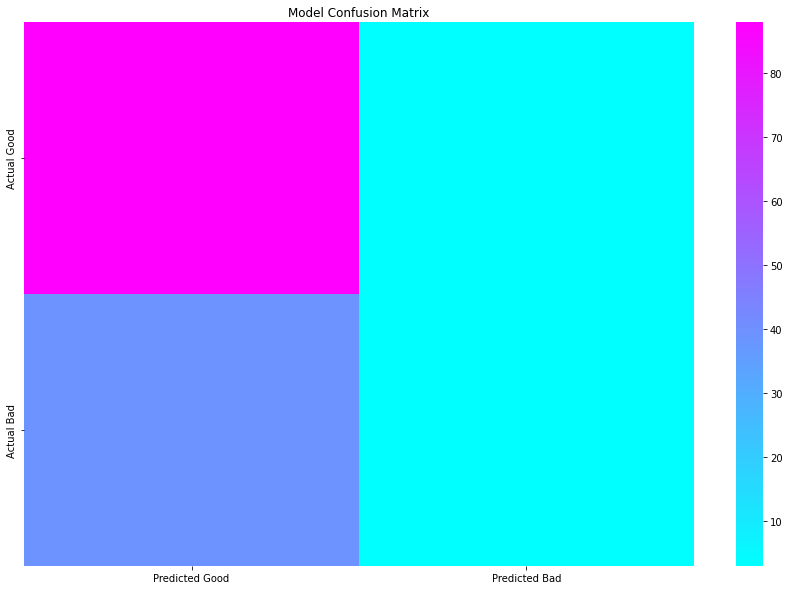

In [ ]:
# Classification Report
print('\n\n', classification_report(y_real, y_mod, target_names=['0-Good', '1-Bad']))
# Confusion Matrix
con_matrix = pd.DataFrame(confusion_matrix(y_real, y_mod), columns=['Predicted Good', 'Predicted Bad'], index=['Actual Good', 'Actual Bad'])
  
plt.figure(figsize=(15,10))
sns.heatmap(data=con_matrix, cmap='cool');
plt.title('Model Confusion Matrix')
plt.show();

In [ ]:
# Birch:  Balanced Iterative Reducing and Clustering using Hierarchies
# “threshold” and “n_clusters” are the hyperparameters

In [ ]:
from sklearn.cluster import Birch


In [ ]:
#Drop target feature
X = data.drop(columns=['Manual Label','Stem Job Title','Stem Pic Title','KB size','Resolution','Width']) 
#'Google Position','Text Regions','Num Resumes','Height',
#X = data.drop(columns=['Manual Label','Stem Job Title','Stem Pic Title']) 
#X['Common']=lista
#X['Division']=divide
#X['Career'] = career
ncluster = 21
# resp = text_variable(corpus,documents,ncluster)
resp = text_variable_Birch(corpus,documents,ncluster)
X['Doc_title'] = resp
ncluster = 21
#resp = text_variable(corpus,job,ncluster)
resp = text_variable_Birch(corpus,job,ncluster)
X['Doc_job'] = resp
W = X
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
model = Birch(threshold=0.01, n_clusters=2)
# fit the model
model.fit(X)
# assign a cluster to each example
y_calc = model.predict(X)
index_no = data['Manual Label'].notna()
y_mod = y_calc[index_no]



               precision    recall  f1-score   support

      0-Good       0.76      0.77      0.77        91
       1-Bad       0.49      0.48      0.48        42

    accuracy                           0.68       133
   macro avg       0.62      0.62      0.62       133
weighted avg       0.67      0.68      0.68       133



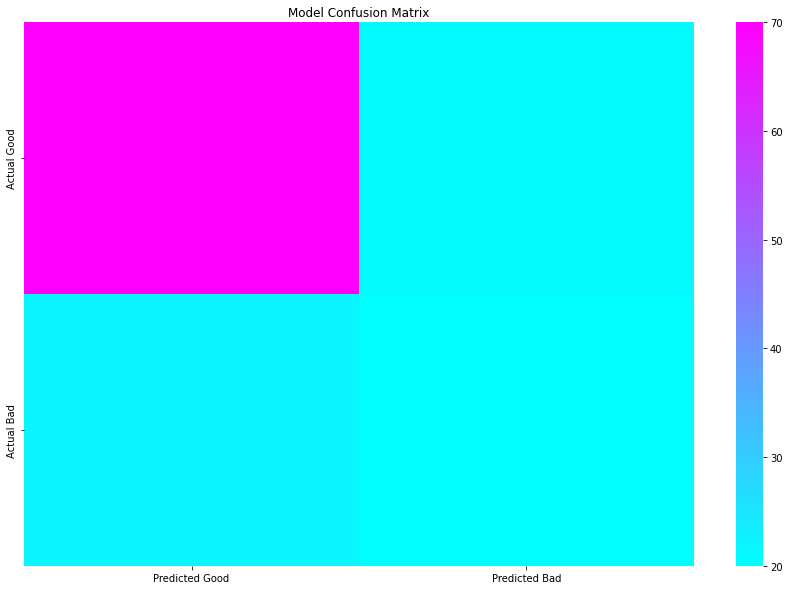

In [ ]:

# Classification Report
print('\n\n', classification_report(y_real, y_mod, target_names=['0-Good', '1-Bad']))
# Confusion Matrix
con_matrix = pd.DataFrame(confusion_matrix(y_real, y_mod), columns=['Predicted Good', 'Predicted Bad'], index=['Actual Good', 'Actual Bad'])
  
plt.figure(figsize=(15,10))
sns.heatmap(data=con_matrix, cmap='cool');
plt.title('Model Confusion Matrix')
plt.show();

In [ ]:
W

,Num Resumes,Google Position,Strict Face Count,Relaxed Face Count,Height,Text Regions,Doc_title,Doc_job
0,1261,0,0,7,1917,2,0,0
1,1261,1,0,3,340,5,0,0
2,1261,2,0,2,380,8,0,0
3,1261,3,0,2,330,1,0,0
4,1261,4,0,1,1075,3,0,0
...,...,...,...,...,...,...,...,...
653,61,4,0,0,720,0,4,4
654,61,5,0,0,200,0,4,4
655,61,6,0,1,500,1,4,4
656,61,7,0,1,920,0,4,4


In [ ]:
#y = data['Manual Label'].replace({'good':0, 'bad':1})
lista = []
for yi in y_calc:
  if(yi == 0):
    lista.append('good')
  else:
    lista.append('bad')

In [ ]:
df['Predict Label'] = lista

In [ ]:
Arq = "output_excel.xlsx"
df.to_excel(Arq)
from google.colab import files
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
Arq = "output_csv.csv"
df.to_csv(Arq)
from google.colab import files
files.download(Arq)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
W['Doc_title'].values

array([ 0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  5,  5,  5,  5,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  6,  6,  6,  6,  6,
       11, 11, 11, 11, 11,  6,  0,  6,  0,  6,  6,  0,  0,  6,  6,  6,  6,
       13,  6,  3,  6,  6, 10, 10, 10, 10, 10, 10, 10, 10,  2,  2,  2,  2,
        0,  0,  0,  0,  0,  0,  3,  3,  3,  2,  3,  3,  8,  0,  8,  8,  0,
        4,  0,  4,  0,  0,  4,  4,  4, 20, 20, 20, 20, 20,  7, 20, 20, 13,
        0,  0,  0,  0,  0,  0,  0,  0, 16, 16, 16, 16, 16, 16, 16,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  0,  0,  0,  0,  0, 16,  0,  0,  0,  2,
        2,  2,  2,  2,  2,  2,  8,  8,  0,  0,  0,  0,  0,  0,  0,  6,  6,
        6,  6,  6,  6,  6,  0,  7,  7,  7,  7,  7,  7,  0,  7,  7,  7,  7,
        8,  8,  8,  8,  0,  1,  1,  2,  1,  2,  1, 12, 12, 12, 12, 12, 12,
       12, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  2,  5,  5,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [ ]:
W['Doc_job'].values

array([ 0,  0,  0,  0,  0,  0,  0,  0,  5,  5,  5,  5,  5,  5,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  6,  6,  6,  6,  6, 11,
       11, 11, 11, 11, 11,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  6,  6,  6, 10, 10, 10, 10, 10, 10, 10, 10,  2,  2,  2,  2,
        0,  0,  0,  0,  0,  0,  3,  3,  3,  3,  3,  3,  8,  8,  8,  8,  8,
        4,  4,  4,  4,  4,  4,  4,  4, 20, 20, 20, 20, 20, 20, 20, 20,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 16, 16, 16, 16, 16, 16, 16,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  0,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        2,  2,  2,  2,  2,  8,  8,  8,  0,  0,  0,  0,  0,  0,  0,  6,  6,
        6,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,
        8,  8,  8,  8,  1,  1,  1,  1,  1,  1,  1, 12, 12, 12, 12, 12, 12,
       12, 12,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  5,  5,  5,  5,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0